In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, r2_score, root_mean_squared_error

In [3]:
df = pd.read_csv('data/train-test/data_sklearn_models.csv')
df.head()

,storey_range,resale_price,latitude,longitude,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.449019,1.375097,103.837619,0,0,0,0,0,0,...,0,0,0,0,-1.546558,-0.345484,-0.802967,-0.833389,-0.524994,-0.375705
1,0,12.524526,1.373922,103.855621,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.727997,-0.802967,-0.167970,-0.582020,0.258150
2,0,12.560244,1.373552,103.838169,0,0,0,0,0,0,...,0,0,0,0,-1.172367,-0.804500,-0.802967,-0.899113,-0.565965,-0.375705
3,0,12.577636,1.367761,103.855357,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.881003,-0.802967,-0.296103,-0.738546,-0.133931
4,2,12.577636,1.371626,103.857736,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.804500,-0.802967,-0.044030,-0.637076,0.258150


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206315 entries, 0 to 206314
Data columns (total 50 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   storey_range                       206315 non-null  int64  
 1   resale_price                       206315 non-null  float64
 2   latitude                           206315 non-null  float64
 3   longitude                          206315 non-null  float64
 4   town_BEDOK                         206315 non-null  int64  
 5   town_BISHAN                        206315 non-null  int64  
 6   town_BUKIT BATOK                   206315 non-null  int64  
 7   town_BUKIT MERAH                   206315 non-null  int64  
 8   town_BUKIT PANJANG                 206315 non-null  int64  
 9   town_BUKIT TIMAH                   206315 non-null  int64  
 10  town_CENTRAL AREA                  206315 non-null  int64  
 11  town_CHOA CHU KANG                 2063

**Explore target as price per flat**

In [5]:
y_values = df['resale_price']
X_values = df.drop('resale_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

165052 41263
165052 41263
(165052, 49) (41263, 49)
(165052,) (41263,)


In [6]:
rf = RandomForestRegressor(random_state = 42, oob_score=True)
rf.fit(X_train, y_train)
print('R2 score:', rf.score(X_test, y_test))
print('Out-of-bag score:', rf.oob_score_)

R2 score: 0.9632128715316759
Out-of-bag score: 0.962850256266572


In [7]:
kf = KFold(n_splits = 10)
scores = cross_val_score(rf, X_values, y_values, cv = kf, scoring='r2') 
print("Cross Validation Scores: ", scores)
print("R2 Score: ", scores.mean())

Cross Validation Scores:  [0.94499138 0.9410018  0.91365259 0.96017337 0.89189146 0.92254598
 0.9439875  0.85638866 0.6481757  0.94620456]
R2 Score:  0.8969012982358209


In [8]:
data_2024 = pd.read_csv('data/train-test/2024-data.csv')
data_2024 = data_2024.drop('year', axis=1)
data_2024.head()

,storey_range,resale_price,latitude,longitude,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.570716,1.373346,103.836459,0,0,0,0,0,0,...,0,0,0,0,-2.211786,-1.607778,2.175147,-0.970227,-0.563772,-0.375705
1,1,12.683858,1.373401,103.849073,0,0,0,0,0,0,...,0,0,0,0,-2.211786,-1.448652,2.175147,-0.345136,-0.596351,-0.340607
2,0,13.161584,1.365266,103.844538,0,0,0,0,0,0,...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
3,8,13.384728,1.365266,103.844538,0,0,0,0,0,0,...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
4,1,12.747815,1.366048,103.838123,0,0,0,0,0,0,...,0,0,0,0,-1.255521,-1.639909,2.175147,-0.940479,-0.753589,0.053899


In [9]:
pred_target = data_2024['resale_price']
pred_set = data_2024.drop('resale_price', axis=1)

In [10]:
prediction = rf.predict(pred_set)

In [11]:
r2 = r2_score(pred_target, prediction)
rmse = root_mean_squared_error(pred_target, prediction)
print("R2 score of Random Forest:", r2)
print("Root Mean Squared Error of Random Forest:", rmse)

R2 score of Random Forest: 0.9483626761381727
Root Mean Squared Error of Random Forest: 0.06771429310843052


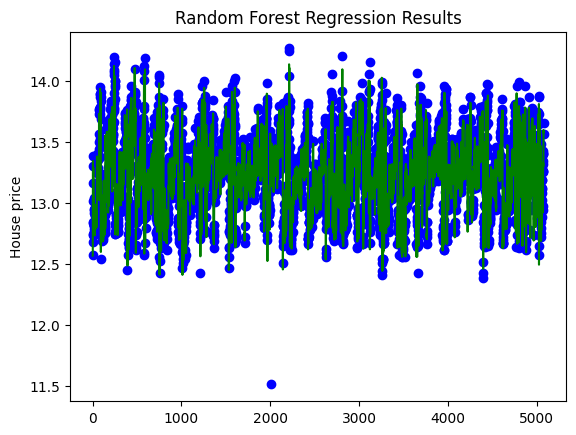

In [16]:
plt.scatter(pred_set.index, pred_target, color='blue') #plotting real points
plt.plot(pred_set.index, prediction,color='green') #plotting for predict points
   
plt.title("Random Forest Regression Results")
plt.xlabel('')
plt.ylabel('House price')
plt.show()

In [12]:
importance = rf.feature_importances_
feature_importances = zip(importance, X_values.columns)
sorted_feature_importances = sorted(feature_importances, reverse = True)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['floor_area_sqm', 'distance2cbd', 'sora', 'remaining_lease', 'storey_range', 'latitude', 'longitude', 'bto_supply_within_4km', 'poi_vector_average', 'flat_model_DBSS', 'flat_model_Model A', 'flat_model_Improved', 'flat_model_New Generation', 'flat_model_Premium Apartment', 'town_BUKIT TIMAH']


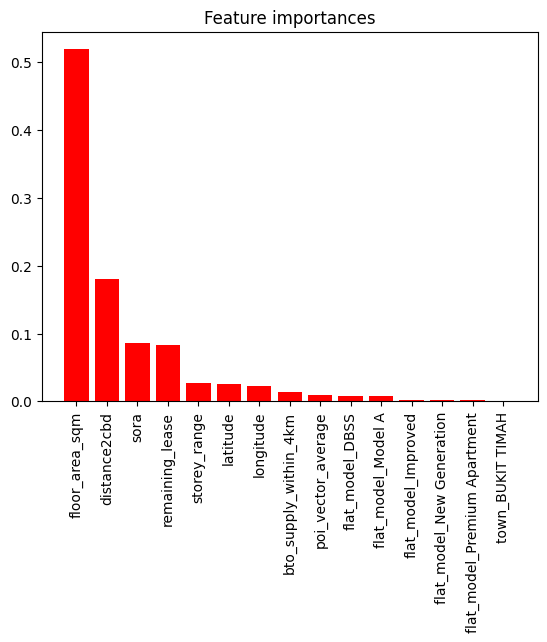

In [13]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center")
plt.xticks(range(len(predictors)), predictors, rotation=90)
plt.show()

**Explore target as price per sqm**

In [17]:
df['price_psqm'] = df['resale_price']/df['floor_area_sqm']
y_values = df['price_psqm']
X_values = df.drop(['price_psqm', 'resale_price', 'floor_area_sqm'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

165052 41263
165052 41263
(165052, 48) (41263, 48)
(165052,) (41263,)


In [18]:
rf = RandomForestRegressor(random_state = 42, oob_score=True)
rf.fit(X_train, y_train)
print('R2 score:', rf.score(X_test, y_test))
print('Out-of-bag score:', rf.oob_score_)

R2 score: 0.29066259752812273
Out-of-bag score: 0.3083426208885006


In [26]:
kf = KFold(n_splits = 10)
scores = cross_val_score(rf, X_values, y_values, cv = kf, scoring='r2') 
print("Cross Validation Scores: ", scores)
print("R2 Score: ", scores.mean())

Cross Validation Scores:  [0.32936658 0.29415011 0.2390435  0.35089465 0.12816222 0.29146541
 0.38346115 0.37825431 0.36679405 0.21786646]
R2 Score:  0.2979458436356818


In [21]:
importance = rf.feature_importances_
feature_importances = zip(importance, X_values.columns)
sorted_feature_importances = sorted(feature_importances, reverse = True)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['remaining_lease', 'sora', 'distance2cbd', 'latitude', 'longitude', 'storey_range', 'poi_vector_average', 'bto_supply_within_4km', 'flat_model_Premium Apartment Loft', 'flat_model_New Generation', 'flat_model_Improved', 'flat_model_Model A', 'flat_model_Type S1', 'town_BEDOK', 'flat_model_Premium Apartment']


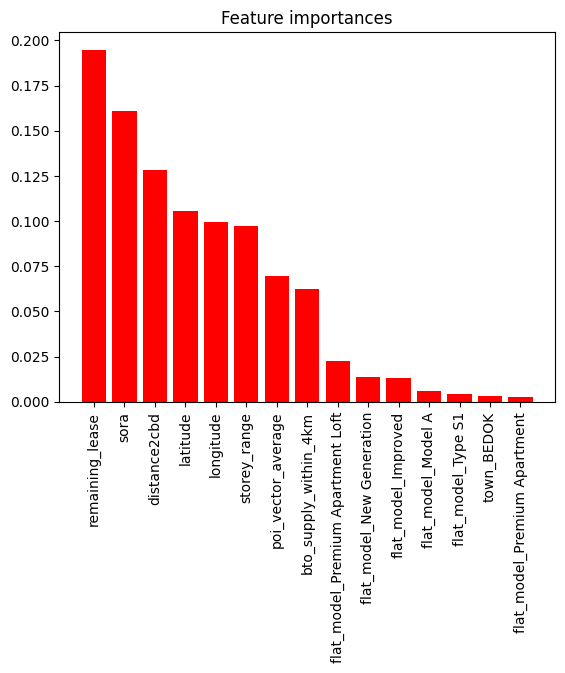

In [22]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center")
plt.xticks(range(len(predictors)), predictors, rotation=90)
plt.show()

In [23]:
data_2024['price_psqm']= data_2024['resale_price']/data_2024['floor_area_sqm']
pred_target = data_2024['price_psqm']
pred_set = data_2024.drop(['price_psqm', 'resale_price', 'floor_area_sqm'], axis=1)

In [24]:
prediction = rf.predict(pred_set)

In [25]:
r2 = r2_score(pred_target, prediction)
rmse = root_mean_squared_error(pred_target, prediction)
print("R2 score of Random Forest:", r2)
print("Root Mean Squared Error of Random Forest:", rmse)

R2 score of Random Forest: 0.2930483991427286
Root Mean Squared Error of Random Forest: 87.85883175512483
